<a href="https://colab.research.google.com/github/YugankDabas/Plant_Disease_Prediction/blob/main/22_7_2025plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
# Importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import google.colab

In [7]:
os.makedirs("/root/.kaggle/", exist_ok=True)

In [8]:
!cp /content/drive/MyDrive/cnn_learn/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download yugankdabas/plant-disease-dataset
!unzip plant-disease-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b31c5bf6-8fbe-4346-a2d4-c4eb1c3a2435___YLCV_NREC 2320.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b32d9472-fd28-467c-9f93-a3c9abbc8acb___UF.GRC_YLCV_Lab 02615.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b346c83d-675f-4fb2-8627-ce4b72851ce5___UF.GRC_YLCV_Lab 01352.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b375b347-80e2-44eb-9266-602253b15d31___YLCV_GCREC 5339.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b37832aa-7585-436a-b434-b3d1a2c62c03___YLCV_GCREC 2460.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b37c4d4b-9780-43fd-934b-6a5df79560bf___UF.GRC_YLCV_Lab 02414.JPG  
  inflating: Plant Disease Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b37e1706-abf7-49c1-9a4c-361b9f586b8a___UF.GRC_YL

In [9]:
# Dataset Path
base_dir = '/content/Plant Disease Dataset'

[[[161 157 154]
  [161 157 154]
  [161 157 154]
  ...
  [118 107 103]
  [118 107 103]
  [118 107 103]]

 [[158 154 151]
  [159 155 152]
  [159 155 152]
  ...
  [118 107 103]
  [118 107 103]
  [118 107 103]]

 [[155 151 148]
  [156 152 149]
  [156 152 149]
  ...
  [117 106 102]
  [117 106 102]
  [117 106 102]]

 ...

 [[147 143 144]
  [145 141 142]
  [147 143 144]
  ...
  [108  97 101]
  [115 104 108]
  [125 114 118]]

 [[147 143 144]
  [145 141 142]
  [147 143 144]
  ...
  [106  95  99]
  [110  99 103]
  [120 109 113]]

 [[149 145 146]
  [147 143 144]
  [148 144 145]
  ...
  [113 102 106]
  [117 106 110]
  [128 117 121]]]
(256, 256, 3)


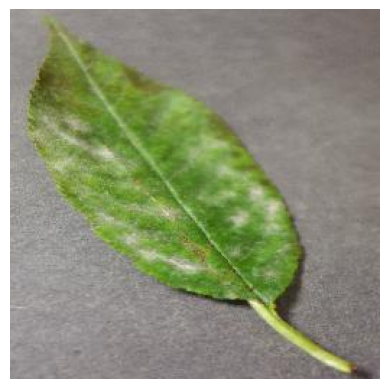

In [11]:
image_path = '/content/Plant Disease Dataset/Cherry_(including_sour)___Powdery_mildew/00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748.JPG'

# Read the image
img = mpimg.imread(image_path)
print(img)
print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [12]:
# Image Parameters
img_size = 256
batch_size = 32

In [13]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [14]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 56246 images belonging to 38 classes.


In [15]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 14043 images belonging to 38 classes.


In [16]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    62,980,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,009,510 (240.36 MB)

 Trainable params: 63,009,510 (240.36 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=50,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1757/1757 ━━━━━━━━━━━━━━━━━━━━ 155s 84ms/step - accuracy: 0.5637 - loss: 1.8302 - val_accuracy: 0.8307 - val_loss: 0.5406
Epoch 2/50
   1/1757 ━━━━━━━━━━━━━━━━━━━━ 2:28 84ms/step - accuracy: 0.8750 - loss: 0.4224

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1757/1757 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8750 - loss: 0.4224 - val_accuracy: 0.8388 - val_loss: 0.5185
Epoch 3/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 205s 110ms/step - accuracy: 0.9253 - loss: 0.2342 - val_accuracy: 0.8484 - val_loss: 0.5038
Epoch 4/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9062 - loss: 0.2428 - val_accuracy: 0.8532 - val_loss: 0.4788
Epoch 5/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 140s 80ms/step - accuracy: 0.9684 - loss: 0.0976 - val_accuracy: 0.8317 - val_loss: 0.6736
Epoch 6/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9062 - loss: 0.2660 - val_accuracy: 0.8322 - val_loss: 0.6643
Epoch 7/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 143s 81ms/step - accuracy: 0.9786 - loss: 0.0673 - val_accuracy: 0.8513 - val_loss: 0.7035
Epoch 8/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8438 - loss: 0.2831 - val_accuracy: 0.8577 - val_loss: 0.6710
Epoch 9/50
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 201s 95ms/step - accuracy: 0.9838 - loss:

In [19]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
438/438 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.8247 - loss: 2.1823
Validation Accuracy: 82.93%


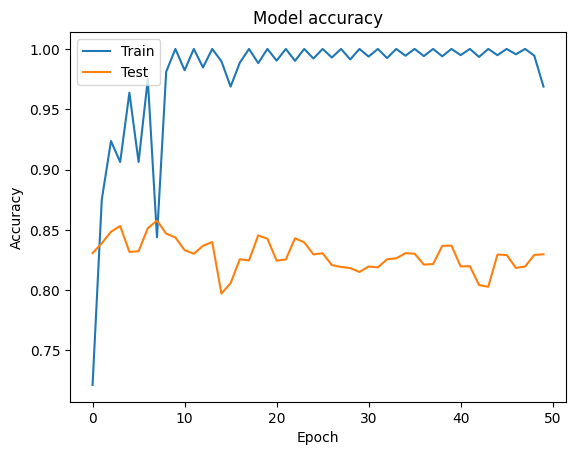

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

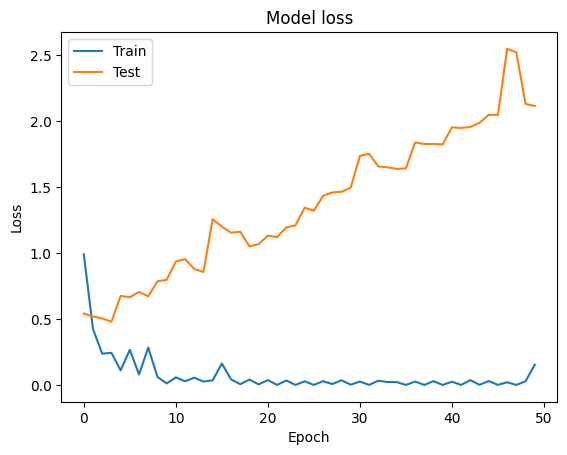

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [23]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [24]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper__bell___Bacterial_spot',
 19: 'Pepper__bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [25]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [27]:
model.save('plant_disease_model.h5')

In [28]:
model.save('plant_disease_model.keras')